## Linear Factor Models

### Performance Measurement

* Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors, all expressed as a percentage. These observations cover the ten-year period from Jan 2004 through Dec 2013.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
risk_factors = pd.read_excel("Risk_Factors.xlsx", index_col = 0)
industry_portfolio = pd.read_excel("Industry_Portfolios.xlsx", index_col = 0)
display(risk_factors)
display(industry_portfolio)

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46
201309,0.00,3.76,2.85,-1.59
201310,0.00,4.17,-1.56,1.31


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


### Q1. Using excess returns for the ten industry portfolios, calculate the following performance metrics:

         • Sharpe ratio

         • Sortino ratio (using risk-free rate as target)

         • Treynor ratio (using CAPM β)

         • Jensen's α

         • Three-factor α

* The sample semi-variance can be estimated as:

$$ \frac{1}{T} \sum_{t=1}^{T} \min \{ R\scriptstyle it \textstyle −R\scriptstyle ft \textstyle ,0 \} ^2 $$

* where Ri is return on industry portfolio and Rf is risk-free rate.

#### Q1.1 Sharpe Ratio

In [3]:
industry = industry_portfolio.columns.tolist()
risk_premium_list = []

for i in industry:
    tag = i+'_'+"risk premium"
    risk_factors[tag] = industry_portfolio[i] - risk_factors["Rf"]
    risk_premium_list.append(tag)
    
Risk_Premium = risk_factors[risk_premium_list].mean()
STD = risk_factors[risk_premium_list].std()

In [4]:
Sharpe_Ratio = Risk_Premium / STD
Sharpe_Ratio_table = pd.DataFrame(data = Sharpe_Ratio, columns = ["Sharpe ratio"]
                                 ).set_index(industry_portfolio.columns)
Sharpe_Ratio_table

,Sharpe ratio
NoDur,0.231099
Durbl,0.072356
Manuf,0.166616
Enrgy,0.181708
HiTec,0.118552
Telcm,0.169064
Shops,0.191753
Hlth,0.172529
Utils,0.210948
Other,0.064693


#### Q1.2 Sortino Ratio

In [5]:
Below_Target_Semi_Variance = []

for i in industry:    
    SVi = np.mean(np.where(industry_portfolio[i] > risk_factors["Rf"],
                           0,
                           industry_portfolio[i] - risk_factors["Rf"]) ** 2)
    Below_Target_Semi_Variance.append(SVi)
    
Below_Target_Semi_Deviation = np.sqrt(Below_Target_Semi_Variance)

In [6]:
Sortino_Ratio = Risk_Premium / Below_Target_Semi_Deviation
Sortino_Ratio_table = pd.DataFrame(data = Sortino_Ratio, columns = ["Sortino ratio"]
                                  ).set_index(industry_portfolio.columns)
Sortino_Ratio_table

,Sortino ratio
NoDur,0.350804
Durbl,0.111967
Manuf,0.241260
Enrgy,0.273612
HiTec,0.170620
Telcm,0.244940
Shops,0.293032
Hlth,0.270294
Utils,0.290044
Other,0.087351


#### Q1.3 Treynor Ratio

In [7]:
Beta_of_Market_Model = []
Alpha_of_Market_Model = []
for i in risk_premium_list:
    result = sm.OLS(risk_factors[i],
                    sm.add_constant(risk_factors["Rm-Rf"])).fit()
    Beta_of_Market_Model.append(result.params[1])
    Alpha_of_Market_Model.append(result.params[0])

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
Treynor_Ratio = Risk_Premium / Beta_of_Market_Model
Treynor_Ratio_table = pd.DataFrame(data = Treynor_Ratio, columns = ["Treynor ratio"]
                                  ).set_index(industry_portfolio.columns)
Treynor_Ratio_table

,Treynor ratio
NoDur,1.186372
Durbl,0.367463
Manuf,0.758251
Enrgy,1.143330
HiTec,0.564295
Telcm,0.836363
Shops,0.951258
Hlth,0.971435
Utils,1.452334
Other,0.299781


#### Q1.4 Jensen's α

In [9]:
Alpha_of_Jensen_table = pd.DataFrame(data = Alpha_of_Market_Model, columns = ["Jensen's α"]
                                    ).set_index(industry_portfolio.columns)
Alpha_of_Jensen_table

,Jensen's α
NoDur,0.369717
Durbl,-0.417903
Manuf,0.160494
Enrgy,0.504485
HiTec,-0.064024
Telcm,0.194348
Shops,0.274093
Hlth,0.236968
Utils,0.446523
Other,-0.387508


#### Q1.5 Three-factor α

In [10]:
Alpha_of_Three_Factor_Model = []
for i in risk_premium_list:
    result = sm.OLS(risk_factors[i],
                    sm.add_constant(risk_factors[["Rm-Rf", "SMB", "HML"]])).fit()
    Alpha_of_Three_Factor_Model.append(result.params[0])

/Users/xiezijun/Documents/anaconda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
Alpha_of_Three_Factor_Model_table = pd.DataFrame(data = Alpha_of_Three_Factor_Model,
                                                 columns = ["Three-factor α"]
                                                ).set_index(industry_portfolio.columns)
Alpha_of_Three_Factor_Model_table

,Three-factor α
NoDur,0.386704
Durbl,-0.474342
Manuf,0.153285
Enrgy,0.523007
HiTec,-0.065979
Telcm,0.200724
Shops,0.255941
Hlth,0.257472
Utils,0.474411
Other,-0.404412


#### Q1.3 Treynor Ratio

### Q2. Create a table showing the performance metrics for the ten industry portfolios.

In [12]:
performance_metrics_table = pd.concat([Sharpe_Ratio_table,
                                       Sortino_Ratio_table,
                                       Treynor_Ratio_table,
                                       Alpha_of_Jensen_table,
                                       Alpha_of_Three_Factor_Model_table],axis = 1)
performance_metrics_table

,Sharpe ratio,Sortino ratio,Treynor ratio,Jensen's α,Three-factor α
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


### Q3. Plot your results as a bar chart for each performance metric.

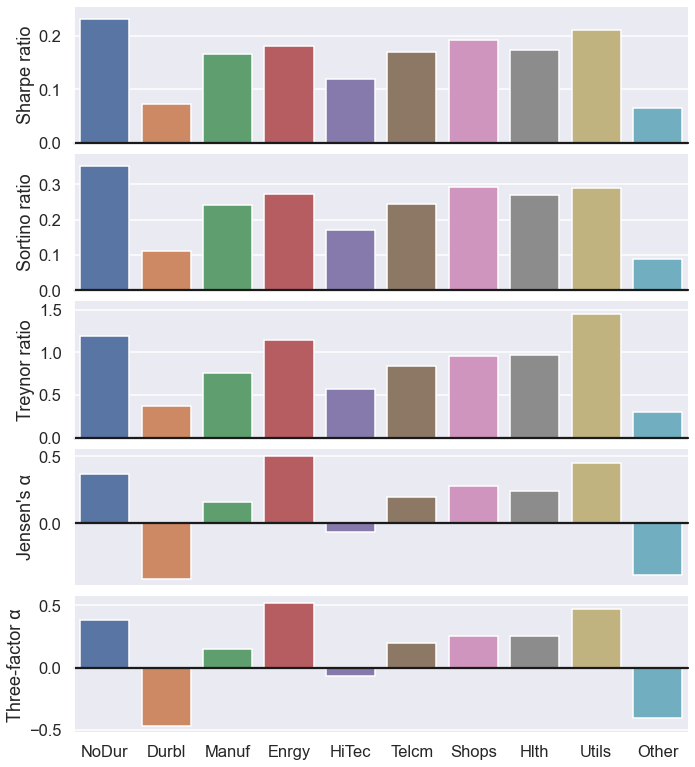

In [21]:
sns.set_theme(style="darkgrid", context="talk")
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 11), sharex=True);
x = performance_metrics_table.index.tolist()
y1 = performance_metrics_table.iloc[:,0]

sns.barplot(x=x, y=y1, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False);
ax1.set_ylim(0.0,performance_metrics_table.iloc[:,0].max()*1.1)
ax1.set_ylabel(performance_metrics_table.columns[0])

y2 = performance_metrics_table.iloc[:,1]
sns.barplot(x=x, y=y2, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylim(0.0,performance_metrics_table.iloc[:,1].max()*1.1)
ax2.set_ylabel(performance_metrics_table.columns[1])

y3 = performance_metrics_table.iloc[:,2]
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylim(0.0,performance_metrics_table.iloc[:,2].max()*1.1)
ax3.set_ylabel(performance_metrics_table.columns[2])

y4 = performance_metrics_table.iloc[:,3]
sns.barplot(x=x, y=y4, palette="deep", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylim (performance_metrics_table.iloc[:,3].min()*1.1,
              performance_metrics_table.iloc[:,3].max()*1.1)
ax4.set_ylabel(performance_metrics_table.columns[3])

y5 = performance_metrics_table.iloc[:,4]
sns.barplot(x=x, y=y5, palette="deep", ax=ax5)
ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylim(performance_metrics_table.iloc[:,4].min()*1.1,
             performance_metrics_table.iloc[:,4].max()*1.1)
ax5.set_ylabel(performance_metrics_table.columns[4])

sns.despine(bottom=True)
plt.tight_layout(h_pad=0.1)

### Q4. Briefly explain the economic significance of each performance metric.

          • 1. Sharpe ratio
         
> Sharp ratio is risk premium per unit of standard deviation. When comparing two assets versus a common benchmark, the one with a higher Sharpe ratio provides better return for the same risk. 

> Most often applied to measuring the performance of equity mutual funds, this ratio captures the average differential return between a fund's return and an appropriate benchmark and the standard deviation of the differences over the period. Sharpe ratio also used to test market efficiency and do risk management.

> Sharpe Ratios above 1.00 are generally considered “good”, as this would suggest that the portfolio is offering excess returns relative to its volatility. Having said that, investors will often compare the Sharpe Ratio of a portfolio relative to its peers. In this case, "NoDur" has the highest Sharpe ratio, it may be considered as the best choice of the 10 industries.

* Sharpe ratio represents risk premium per unit of total risk:

* Includes all types of systematic risk and also idiosyncratic risk, which penalises individual investments and non-diversified portfolios

* Implicitly assumes normal returns, so cannot distinguish between return distributions with same variance but different skewness or kurtosis


         • 2. Sortino ratio
         
> Sortino ratio is expected deviation from target return, per unit of below-target semi-deviation. It is found to be the superior performance measure exhibiting more power and less bias than the Sharpe ratio when the distribution of excess returns are skewed. 

> Both the Sharpe ratio and the Sortino ratio are thought to be useful measures of performance under the circumstances of a clearly defined benchmark. The Sortino ratio is preferred on theoretical grounds as it measures risk as underperformance relative to the predefined benchmark and compensates those managers who have a positively skewed distribution of alpha with a higher performance measure. 

> The Sortino ratio is a more popular way for investors, analysts, and portfolio managers to choose funds to consititute a good portfolio. With the Sortino ratio, we can find out those funds whose performance is better in the past. Funds with higher Sortino ratio should have higher probability to earn return in the future.

* Sortino ratio represents risk premium per unit of downside risk, so can distinguish between asymmetric return distributions with same variance but different skewness


         • 3. Treynor ratio
         
> Treynor ratio is risk premium per unit of market risk. It can be used to compare performance of individual investment to diversified portfolio.

> The Sharpe ratio is based on the total risk of an investment. Its use is most appropriate when an investor intends to place all (or nearly all) of his wealth in one security or portfolio. When an investor is considering the addition of an investment to a well-diversified portfolio, the Treynor ratio is more appropriate, because it is based only on systematic risk. 

> What's more, if you find that the addition of a new fund lowers the Treynor Ratio of the portfolio; it means that the new fund only increased the riskiness of the portfolio without contributing to the overall portfolio returns. Thus, you may relook at your decision of adding the new fund to the portfolio.

* Treynor ratio represents risk premium per unit of market risk, which ignores other types of systematic risk


         • 4. Jensen's α
         
> Jensen's α is intercept coefficient from market model regression using excess returns. For passive portfolio, it represents pricing error relative to CAPM; for active portfolio, it represents abnormal mean return after adjusting for exposure to market risk, due to fund manager's ability to identify underpriced or overpriced assets.

> Jensen’s alpha often used as a measure of abnormal performance in the evaluation of securities and portfolios where abnormal performance is defined to be an expected return that exceeds the equilibrium risk adjusted rate. In addition, a nonzero Jensen’s alpha represents an arbitrage opportunity. What's more, even if the correct factors and time varying betas are used, a nonzero Jensen’s alpha can result if the estimate is conditioned on the wrong information set in the presence of an asset price bubble. In this case, the "Enrgy" has the biggest arbitrage opportunity than others.

* Jensen's α represents pricing error (or abnormal mean return) after adjusting for exposure to market risk


         • 5. Three-factor α
         
> Three-factor α is intercept coefficient from three-factor model regression. 

> It is considered that a statistically significant positive (negative) three-factor alpha indicates a superior (inferior) performance of the asset in relation to the market, so the alpha can used as a strategy signal. It can also used as a performance indicator and signal for sector rotation.

* Three-factor α represents pricing error (or abnormal mean return) after adjusting for exposure to market risk, size risk, and value risk